In [1]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 

In [2]:
LDAtopics = [ ['miss', 'hill', 'search', 'inquiri','call','famili','polic','abus','health','report'],
           ['fund', 'council', 'cut', 'plan','mine','job','market','rise','rate','school'],
              ['elect', 'labor', 'minist', 'vote','australia','rudd','leader','asylum','parti','abbott'],
              ['interview', 'dai', 'speak', 'test','win','ash','pacif','australia','final','beat'],
              ['fire', 'warn', 'water', 'plan','flood','bushfir','council','resid','power','mine'],
              ['crash', 'countri', 'kill', 'coast','hit','hour','car','di','train','fire'],
              ['farmer', 'nrn', 'farm', 'cattl','rain','dairi','export','food','drought','grower'],
              ['rural', 'abc', 'nation', 'busi','new','weather','market','sa','report','sport'],
              ['polic', 'charg', 'court', 'murder','accus','jail','trial','arrest','drug','assault'],
              ['win', 'ban', 'afl', 'take','race','call','week','set','black','tour']]

BERTopics =  [ ['armed','robbery', 'sexual', 'cannabis', 'priest', 'bikie', 'robber', 'bikies', 'offender', 'bashing'],
           ['firefighter', 'bushfires', 'arson', 'burning','rf','blaze','destroys','burn','grassfire', 'crew'],
              ['mariner','rooster','bulldog','eagle','nrl','brumbies','bronco','wanderer','roar','knight'],
              ['trent','robinson','griffin','elliott','extended','josh','wayne','bennett','johnathan','matthew'],
              ['dam','irrigation','flooding','levee','mitigation','allocation','floodwaters','sewerage','basin','flash'],
              ['motorcyclist','pedestrian','drowns','rider','accident','motorbike','collision','cyclist','fiery','crashing'],
              ['ore','iron','miner','seam','quarry','coal','mineral','nickel','copper','exploration'],
              ['wheat','grain','agriculture','horticulture','agricultural','onion','farming','hay','gmo','usda'],
              ['spying','vanuatu','spy','nsa','nauru','papua','timor','indonesian','seeker','wikileaks'],
              ['nurse','nursing','medical','springborg','clinic','moura','bed','elective','payroll','doctor']]

In [3]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

AttributeError: ignored

In [ ]:
data = pd.read_csv('abcnews-date-text.csv', on_bad_lines='skip')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data["year"] = data["publish_date"].astype(str).str[:4].astype(np.int64)
data["month"] = data["publish_date"].astype(str).str[4:6].astype(np.int64)
data["char_count"] = data["headline_text"].str.len()
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,publish_date,headline_text,year,month,char_count
0,20030219,aba decides against community broadcasting lic...,2003,2,50
1,20030219,act fire witnesses must be aware of defamation,2003,2,46
2,20030219,a g calls for infrastructure protection summit,2003,2,46
3,20030219,air nz staff in aust strike for pay rise,2003,2,40
4,20030219,air nz strike to affect australian travellers,2003,2,45


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Select rows where the year is 2013
rows_2013 = data[data['year'] == 2013]

# Count the number of rows
count_2013 = len(rows_2013)

print("Rows with year 2013:")
print(rows_2013)
print("Count:", count_2013)

Rows with year 2013:
        publish_date                                      headline_text  year  \
752022      20130101              abc business news and market analysis  2013   
752023      20130101                                  abc entertainment  2013   
752024      20130101                                          abc sport  2013   
752025      20130101                                        abc weather  2013   
752026      20130101                     agriculture challenges in 2013  2013   
...              ...                                                ...   ...   
843945      20131231  women dominate honours list beckham and murray...  2013   
843946      20131231        wonawinta edges closer to production target  2013   
843947      20131231                      woodruff a new tax on illness  2013   
843948      20131231                                 world media rights  2013   
843949      20131231   your say the most important news stories of 2013  2013   

      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df=data[752027:843949] # because the first 5 columns are just titles of the sections.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
docs=df.headline_text.to_list()
docs[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['america reaches bipartisan agreement to defer',
 'amy phillips speaks to bruce collins',
 'amy phillips speaks to steph coombes',
 'aquacultures forgotten fish',
 'arnold optimistic of keeping rogic ryan',
 'australia and neighbours ring in new year with fireworks',
 'australia takes up security council seat today',
 'bennell charged with disorderly behaviour',
 'big year for ouse farmer',
 'bill and del nuske']

In [ ]:
tokenizer = lambda s: re.findall( '\w+', s.lower() )
docs = [ tokenizer(t) for t in  docs ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\w'
<>:1: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-9-7abc9dbd09de>:1: DeprecationWarning: invalid escape sequence '\w'
  tokenizer = lambda s: re.findall( '\w+', s.lower() )


In [ ]:
# Creating a dictionary with the headlines
word2id = Dictionary(docs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Coherence model
cm = CoherenceModel(topics=LDAtopics,
                    texts=docs,
                    coherence='c_v',
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


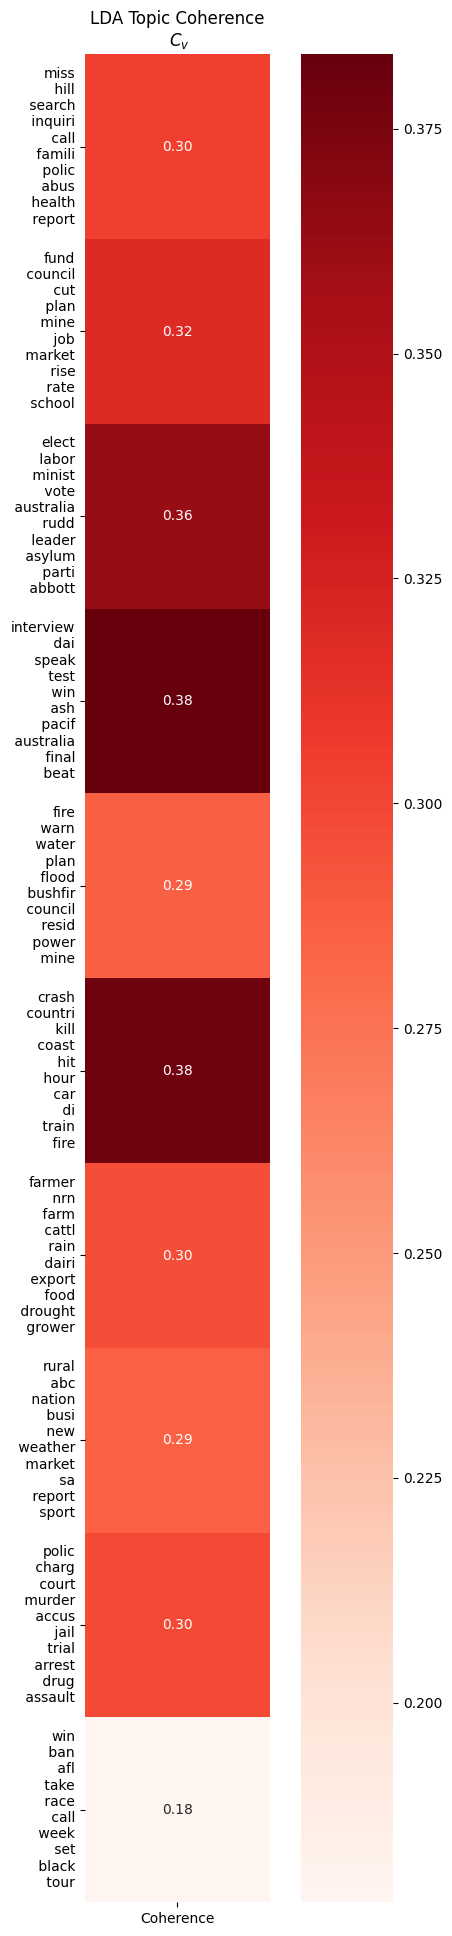

In [ ]:
topics_str = [ '\n '.join(t) for t in LDAtopics ]
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(8,24) )
ax.set_title("LDA Topic Coherence\n $C_v$")
sns.heatmap(data=data_topic_score, annot=True, square=True,
            cmap='Reds', fmt='.2f',
            linecolor='black', ax=ax )
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()

In [ ]:
avg = (.18 + .3 + .29 + .3 + .38 + .29 + .38 + .36 + .32 + .3)/10
print("The average coherence score for LDATopics is:", avg)

The average coherence score for LDATopics is: 0.30999999999999994


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Coherence model
cm2 = CoherenceModel(topics=BERTopics,
                    texts=docs,
                    coherence='c_v',
                    dictionary=word2id)

coherence_per_topic2 = cm2.get_coherence_per_topic()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


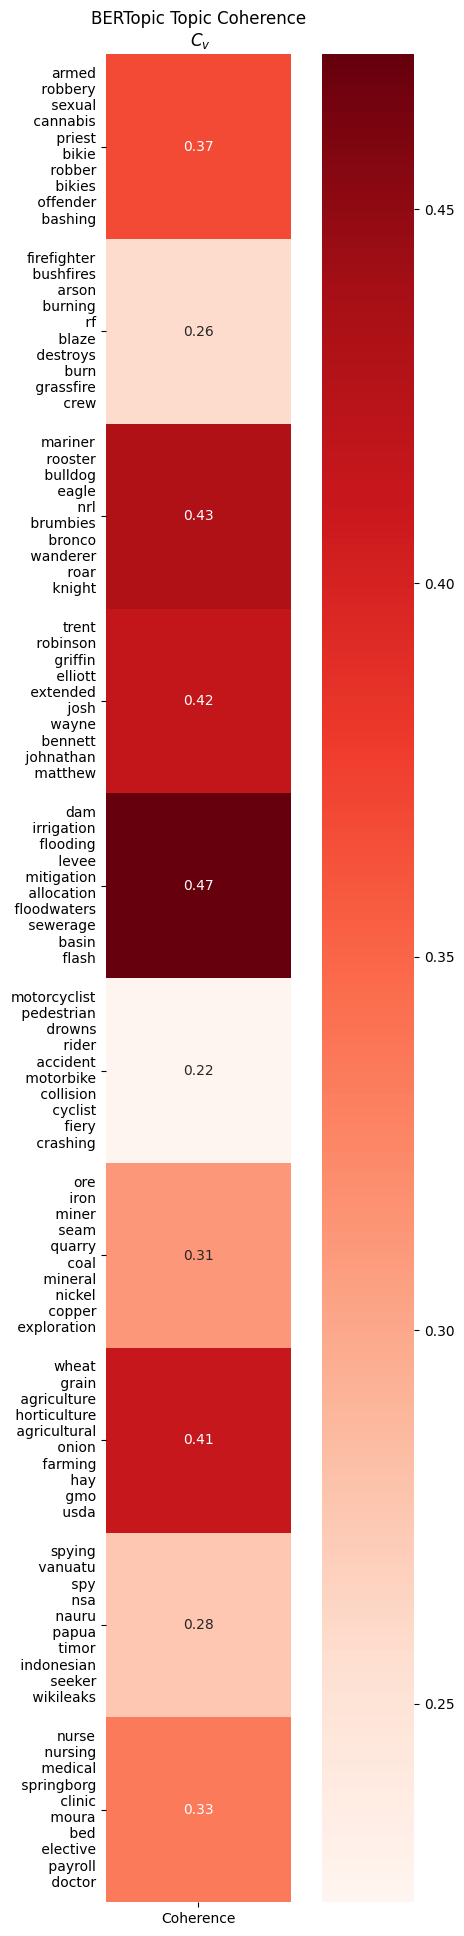

In [ ]:
topics_str = [ '\n '.join(t) for t in BERTopics ]
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic2), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(8,24) )
ax.set_title("BERTopic Topic Coherence\n $C_v$")
sns.heatmap(data=data_topic_score, annot=True, square=True,
            cmap='Reds', fmt='.2f',
            linecolor='black', ax=ax )
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()

In [ ]:
avg2 = (.33 + .28 + .41 + .31 + .22 + .47 + .42 + .43 + .26 + .37)/10
print("The average coherence score for BERTopics is:", avg2)

The average coherence score for BERTopics is: 0.35


In [ ]:
 # BERT Word Embeddings

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a list of words
def get_bert_embeddings(words_list):
    # Tokenize the list of words
    inputs = tokenizer(words_list, return_tensors='pt', padding=True, truncation=True)

    # Get BERT embeddings
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract embeddings for each word
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze(0)

    return embeddings


# Get embeddings for each word in each LDA topic
LDAtopic_embeddings = []
for topic_words in LDAtopics:
    embeddings = get_bert_embeddings(topic_words)
    LDAtopic_embeddings.append(embeddings)

# Print BERT embeddings for each topic
for i, embeddings in enumerate(LDAtopic_embeddings):
    print(f"Topic {i + 1} embeddings:\n", embeddings)

# Get embeddings for each word in each BERTopic
BERTopic_embeddings = []
for topic_words in BERTopics:
    embeddings = get_bert_embeddings(topic_words)
    BERTopic_embeddings.append(embeddings)

# Print embeddings for each topic
for i, embeddings in enumerate(BERTopic_embeddings):
    print(f"Topic {i + 1} embeddings:\n", embeddings)


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
def calculate_coherence(topic_embeddings):
    similarities = [cosine_similarity(topic, topic) for topic in topic_embeddings]
    mean_similarities = [np.mean(similarity[np.triu_indices(similarity.shape[0], k=1)]) for similarity in similarities]
    return mean_similarities

LDAtopic_coherence = calculate_coherence(LDAtopic_embeddings)
BERTopic_coherence = calculate_coherence(BERTopic_embeddings)

print("LDA Topic Coherences:", LDAtopic_coherence)
print("BERTopic Coherences:", BERTopic_coherence)

In [ ]:
print("LDA Mean Coherence:", np.mean(LDAtopic_coherence))
print("BERTopic Mean Coherence:", np.mean(BERTopic_coherence))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
topics_str = [ '\n '.join(t) for t in LDAtopics ]
data_topic_score = pd.DataFrame(data=zip(LDAtopics, LDAtopic_coherence), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(8,24) )
ax.set_title("BERT Word Embeddings\n $Topic Coherence$")
sns.heatmap(data=data_topic_score, annot=True, square=True,
            cmap='Reds', fmt='.2f',
            linecolor='black', ax=ax )
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
topics_str = [ '\n '.join(t) for t in BERTopics ]
data_topic_score = pd.DataFrame(data=zip(BERTopics, BERTopic_coherence), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(8,24) )
ax.set_title("BERT Word Embeddings\n $Topic Coherence$")
sns.heatmap(data=data_topic_score, annot=True, square=True,
            cmap='Reds', fmt='.2f',
            linecolor='black', ax=ax )
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()